imports, webdriver

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

import operator

import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm
import statistics


def web_driver():

    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--incognito')
    chrome_options.add_argument('--disable-dev-shm-usage')

    return webdriver.Chrome(options = chrome_options)

def ebay_search(driver, query):
    
    driver.get("https://www.ebay.com/")
    searchbar = driver.find_element(By.XPATH, '//*[@id="gh-ac"]')
    searchbar.clear()
    searchbar.send_keys(query)
    searchbar.send_keys(Keys.RETURN)

def scrape_names_prices(driver, num_pages, output_type):


    #just make dict

    
    pricesList = []
    namesList = []
    pricesList_num = []

    for _ in range(num_pages):
        raw_prices = driver.find_elements(By.CLASS_NAME, 's-item__price')
        raw_names = driver.find_elements(By.CLASS_NAME, 's-item__title')

        for element in raw_prices:
            price = element.text.replace('$', '')
            price = price.replace(',', '')
            pricesList.append(price)

            if ' to ' in price:
                #i.e. 10.00 to 20.00
                price = (float(price.split(' to ')[0]) + float(price.split(' to ')[1])) / 2
            pricesList_num.append(price)

        for element in raw_names:
            namesList.append(element.text)

        try:
            print("next page")
            time.sleep(1)
            next_button = driver.find_element(By.CLASS_NAME, "pagination__next")
            next_button.click()
            time.sleep(1)
        except:
            print("no more pages")
            
    while '' in pricesList:
        pricesList.remove('')

    while '' in pricesList_num:
        pricesList_num.remove('')
    
    while '' in namesList:
        namesList.remove('')
    
    pricesList_float = []
    for item in pricesList_num:
        pricesList_float.append(round(float(item), 2))

    item_name_and_price = {namesList[i] : pricesList_num[i] for i in range(len(namesList))}

    if output_type == 'np':
        return item_name_and_price
    elif output_type == 'p':
        return pricesList_float
    elif output_type == 'n':
        return namesList
    else:
        return 'kys'
    
def sort_list(items_prices_dict):
    return {k: v for k, v in sorted(items_prices_dict.items(), key = lambda item: item[1])}

def confirm_float(list):
    n = 0
    for item in list:
        if isinstance(item, float) == True:
            n += 1
        if n == len (list):
            return n
        
def remove_outliers(prices_list, n):
    sd = statistics.stdev(prices_list)
    mean = statistics.mean(prices_list)
    median = statistics.median(prices_list)

    prices_no_outliers = []

    for price in prices_list:
        if price > n * sd:
            print(f"outlier of price {price}")
        else:
            prices_no_outliers.append(price)
    
    return prices_no_outliers

def boxplot_prices(prices_list, query):

    plt.boxplot(prices_list)
    plt.title("average price of '" + query + "'")
    plt.xticks([1], ['query'])
    plt.show()

def boxplot_compare(prices1, prices2, label1, label2):
    
    prices_dict = {label1: prices1, label2: prices2}
    plt.boxplot(prices_dict.values(), labels = prices_dict.keys())


In [2]:
#Depop Scraper - finds key statistics + list of prices for a specific item
#input: search term, number of scrolls
# TY ian


#---1--- PACKAGES

#import packages
from bs4 import BeautifulSoup

#---2--- BROWSER SETUP

#---3--- READ WEBPAGE + GET DATA

#returns a list of prices formatted as floats for n scrolls
def get_depop_prices(driver, search_word, num_scrolls):

  #access product_url
  depop_url = (f"https://www.depop.com/search/?q={search_word}")

  #initialize driver
  driver.get(depop_url)

  #scroll and find prices
  for i in range(num_scrolls):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

  #read contents via BeautifulSoup
  soup = BeautifulSoup(driver.page_source, 'html.parser')
  listings = []


  single_scroll_listings = (soup.select('[class *= "Price-styles__FullPrice"]'))
  listings.extend(single_scroll_listings)

  #close webpage
  driver.quit()

  #put prices in list
  str_prices = [element.get_text().strip() for element in listings]

  #convert prices to float datatype
  float_prices = []
  for price in str_prices:
    single_float = float(price[1:].replace(",", ""))
    float_prices.append(single_float)

  #return list of prices in float datatype
  return float_prices

In [6]:
driver = web_driver()

query = input("search for?")
num_pages = input("how many pages?")

ebay_search(driver, query)
ebay_names_prices = scrape_names_prices(driver, int(num_pages), 'np')
enp_sorted = sort_list(ebay_names_prices)

next page


TypeError: '<' not supported between instances of 'float' and 'str'

In [9]:
print(ebay_names_prices)

{"Men's Slim Fit Jeans Skinny Stretch Denim Pants": '23.49', 'Levis 501 Original Fit Jeans Straight Leg Button Fly 100% Cotton Blue Black': '57.93', "DENIZEN from Levi's Men's 216 Slim Fit Jeans": '17.99', "Women's High-Rise Wide Leg Jeans - Universal Thread": '18.79', "Levi's® Men's 511 Slim Fit Jeans": 27.49, "Men's Skinny Fit Jeans - Goodfellow & Co": 14.995, "Women's Mid-Rise 90's Baggy Jeans - Universal Thread": '15.03', 'FASHIO Mens Denim Ripped Skinny Fit Stretch Slim Fit Biker Pants Destroyed Jeans': '21.84', "Women's Mid-Rise Boyfriend Jeans - Universal Thread": '9.40', "Victorious Men's Skinny Fit Jeans Stretch Colored Pants DL937 - FREE SHIP": 30.450000000000003, "Alamo Stretch Slim Fit Jeans for Men - Classic Denim Men's Jeans with 5 Pockets": 21.74, 'Jeans Mens Stretch Skinny Fit Slim Denim Pant Original Straight Light Blue Pant': '22.09', "Men's Black Stars Embroidery Patchwork Ripped Skinny Denim Distressed Blue Jeans": '58.48', "Lee Men's Regular Straight 5-Pocket Jeans

In [4]:
driver = web_driver()


query = input("search for?")
num_pages = input("for how many pages?")

ebay_search(driver, query)

ebayprices = scrape_names_prices(driver, int(num_pages), 'p')

time.sleep(2)

depopprices = get_depop_prices(driver, query, int(num_pages))

next page
next page


outlier of price 249.99
outlier of price 375.0
outlier of price 135.96
outlier of price 199.99
outlier of price 130.0
outlier of price 131.75
outlier of price 145.0
outlier of price 220.0
outlier of price 224.99
outlier of price 145.0
outlier of price 500.0
outlier of price 224.99
outlier of price 135.15
outlier of price 125.0
outlier of price 175.0
outlier of price 180.0
outlier of price 150.0
outlier of price 219.0
outlier of price 154.0
outlier of price 180.49
outlier of price 170.0
outlier of price 200.0
outlier of price 350.0
outlier of price 165.0
outlier of price 224.99
outlier of price 170.0
outlier of price 135.15
outlier of price 161.49
outlier of price 150.0
outlier of price 150.0
outlier of price 148.75
outlier of price 275.0
outlier of price 212.49
outlier of price 150.0
outlier of price 140.0
outlier of price 250.0
outlier of price 155.0
outlier of price 157.21
outlier of price 248.0
outlier of price 130.0
outlier of price 175.0
outlier of price 208.99
outlier of price 15

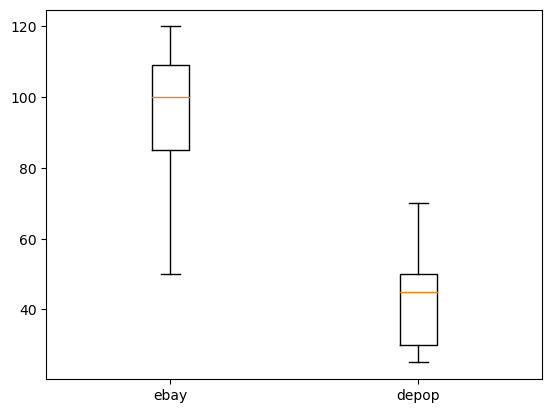

In [6]:
ebayprices_filt = remove_outliers(ebayprices, 1)
depopprices_filt = remove_outliers(depopprices, 1)

boxplot_compare(ebayprices_filt, depopprices_filt, 'ebay', 'depop')

In [7]:
driver.quit()